# Shark Tank

The data contains information about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

In [ ]:
import pandas as pd
import numpy as np

Getting and Cleaning the Data

In [ ]:
df = pd.read_csv("https://dlsun.github.io/pods/data/sharktank.csv")
df.set_index("Company", inplace=True)

In [ ]:
df["Corcoran"].fillna(0, inplace=True)
df["Cuban"].fillna(0, inplace=True)
df["Greiner"].fillna(0, inplace=True)
df["Herjavec"].fillna(0, inplace=True)
df["John"].fillna(0, inplace=True)
df["O'Leary"].fillna(0, inplace=True)
df["Harrington"].fillna(0, inplace=True)
df["Guest"].fillna(0, inplace=True)
df.head()

,Season,No. in series,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
Company,,,,,,,,,,,,,,,,
Ava the Elephant,1.0,1.0,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Mr. Tod's Pie Factory,1.0,1.0,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
Wispots,1.0,1.0,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
College Foxes Packing Boxes,1.0,1.0,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Ionic Ear,1.0,1.0,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
# the $ and % are recognized as ASCII characters and not numerical type
df["Amount"] = df["Amount"].str.strip("$")
df["Amount"] = df["Amount"].str.replace(",", "").astype(float)
df["Equity"] = df["Equity"].str.strip("%").astype(float)
df.head()

,Season,No. in series,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
Company,,,,,,,,,,,,,,,,
Ava the Elephant,1.0,1.0,Yes,Healthcare,Female,50000.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Mr. Tod's Pie Factory,1.0,1.0,Yes,Food and Beverage,Male,460000.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
Wispots,1.0,1.0,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
College Foxes Packing Boxes,1.0,1.0,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Ionic Ear,1.0,1.0,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Which Company was Worth the Most?

In [ ]:
df["Valuation"] = df["Amount"] / (df["Equity"] / 100)
df["Valuation"].replace([np.inf, -np.inf], np.nan, inplace=True)
print("Highest Valuation: ", df["Valuation"].idxmax(), df["Valuation"].max(), "\nLargest total investment: ", df["Amount"].idxmax(), df["Amount"].max())

Highest Valuation:  Zipz 25000000.0 
Largest total investment:  AirCar 5000000.0


**The most valuable company was Zipz at \$25,000,000 but this was not the same as the company with the largest total investment. That was AirCar at \$5,000,000.**

## Which Shark Invested the Most?

In [ ]:
df_sharks = df[["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington", "Guest"]]
df["# Sharks funded"] = df_sharks.sum(axis=1)

for shark in ["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington", "Guest"]:
  mask = (df[shark] == 1.0)
  df_valid = df[mask]
  df.loc[mask, shark] = df_valid["Amount"] / df_valid["# Sharks funded"]
df.loc["Total"] = df[["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington", "Guest"]].sum(numeric_only=True)
df_totals = df[["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington", "Guest"]]
print(df_totals.loc["Total"])
print("Largest investor:", df.loc["Total"].fillna(0).idxmax(axis=1))

Corcoran       4912500.0
Cuban         17817500.0
Greiner        8170000.0
Herjavec      16297500.0
John           8154000.0
O'Leary        7952500.0
Harrington      800000.0
Guest           400000.0
Name: Total, dtype: float64
Largest investor: Cuban


**Cuban was the largest investor over the 6 seasons with $17,817,500 invested.**

## Do the Sharks Prefer Certain Industries?

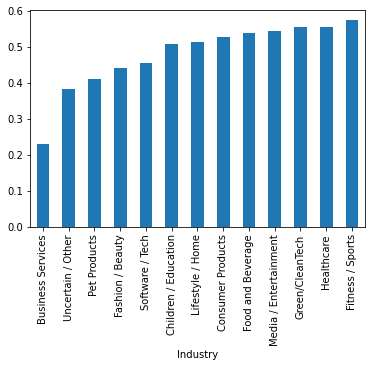

In [ ]:
def mapFunded(c):
  if c == 0:
    return 0
  return 1
df["Funded"] = df["# Sharks funded"].map(mapFunded)
df.groupby("Industry").apply(lambda x: x["Funded"].sum()/len(x)).sort_values(ascending = True).plot.bar()

**The Sharks seem to prefer industries like Fitness/Sports, Green/CleanTech, Healthcare, and Media/Entertainment to name a few. They don't seem to prefer industries such as Business Services, Pet Products, and Fashion/Beauty.**